# Limpieza de datos 

In [1]:
import pandas as pd
import os

In [2]:
mainpath = "/Users/fsanmartin/python-ml-course-master/datasets/"
filename = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_csv(fullpath)

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data2 = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')

In [6]:
data2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
data2.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

## Carga de datos a través de la función open

In [8]:
def df_via_open(path, sep=','):
    '''
    Esta función sirve para crear un dataframe a través de la lectura de un archivo línea a línea.
    Se asume que el nombre de las columnas viene en la primera línea del archivo.
    
    df_via_open(path, sep=',')
    
    Entradas:
    
    path = directorio del archivo a cargar
    sep = separador o delimitador entre los datos, por defecto se deja en la coma (,).
    
    Salida:
    
    Dataframe del archivo ingresado
    
    '''
    
    # Se abre el archivo en modo lectura y se almacena en el objeto "data"
    data = open(path, 'r')
    
    # Seleccionar la primera línea del archivo y convertirla en una lista de "n" elementos
    # donde cada elemento representa el nombre de la columna
    columnas = data.readline().strip().split(sep)
    
    # También se cuentan la cantidad de columnas y se guarda en el objeto "largo_columnas"
    largo_columnas = len(columnas)
    
    # Se inicia un contador y un diccionario ("contador" y "main_dict" respectivamente)
    contador = 0
    main_dict = {}
    
    # Se agrega al diccionario vacío, las columnas obtenidas
    for col in columnas:
        
        main_dict[col] = []
    
    # Se realiza un ciclo donde se leerá cada línea del archivo
    
    for linea in data:
        
        # Para cada línea se convierte en una lista de "n" elementos
        # cada elemento representa el valor de la variable en la posición i
        values = linea.strip().split(",")
        
        # Se realiza un recorrido de las posiciones (índices) de cada elemento perteneciente
        # a la lista de columnas.
        for i in range(len(columnas)):
            
            # Se agrega al diccionario el nombre de la columna con su valor respectivo 
            # asociado a la línea que se está recorriendo
            main_dict[columnas[i]].append(values[i])
        
        # Se aumenta el contador en 1 por cada línea recorrida
        contador += 1
    
    # Se transforma el diccionario obtenido a un dataframe
    dataframe = pd.DataFrame(main_dict)
    
    # Se retorna como resultado el dataframe
    return dataframe

In [9]:
df = df_via_open('/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.


## Lectura y escritura de ficheros

In [10]:
# Creamos un objeto que contiene el archivo existente de entrada: "infile"
infile = '/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt'

# Creamos un objeto que contendrá el archivo de salida: "outfile"
outfile = '/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Tab Customer Churn Model.txt'

In [11]:
# Se abre en modo lectura el archivo de entrada
with open(infile, 'r') as infile1:
    
    # En modo escritura, abrimos el archvivo de salida
    with open(outfile, 'w') as outfile1:
        
        # Para cada línea del archivo de entrada
        for line in infile1:
            
            # Estraemos los "n" elementos de la línea
            fields = line.strip().split(',')
            
            # Escribimos en el archivo de salida cada elemento de la línea separado por un tabulador
            
            outfile1.write('\t'.join(fields))
            
            # Agregamos un saltó de línea al terminar de escribir los elementos de la línea.
            outfile1.write('\n')

# Abrimos el archivo de salida como un dataframe, ocupando como separador la tabulación ('\t')
df4 = pd.read_csv(outfile, sep='\t')

#Revisamos los primeros 5 registros
df4.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.



## Leer datos desde una URL

In [12]:
medals_url = "http://winterolympicsmedals.com/medals.csv"

In [13]:
medals_data = pd.read_csv(medals_url)
medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


## Ficheros XLS y XLSX

In [14]:
mainpath = "/Users/fsanmartin/python-ml-course-master/datasets/"
filename = "titanic/titanic3.xls"
fullpath = os.path.join(mainpath, filename)
titanic2 = pd.read_excel(fullpath, 'titanic3')
titanic2.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


# Resumen de datos: dimensiones y estructuras

In [15]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
data.shape

(1309, 14)

In [17]:
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [18]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

Resumen básico de las variables numéricas

In [19]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [20]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

### Datos perdidos

In [21]:
data['body'].isnull().values.sum()

1188

Los valores que faltan en un data set pueden venir por dos razones:

- Extracción de los datos
- Recolección de los datos

¿Qué hacer con los valores perdidos?

#### 1. Borrado de valores que faltan

1.1.- Borrar las filas con datos perdidos

1.2.- Borrar la columna

In [22]:
#Borrar la fila, solo si todas las columnas son valores perdidos
data.dropna(axis=0, how="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [23]:
data2 = data

#Borrar la fila, si al menos una de las columnas es un valor perdido
data2.dropna(axis=0, how="any")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


¿Qué ocurrió? Pues, sólo existen filas que tienen al menos un valor perdido en sus columnas

### Cómputo de los valores faltantes

In [24]:
data3 = data


# Rellenar los valores perdidos con un 0
data3.fillna(0)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,0.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,0.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0,0.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,0.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,0,C,0,22.0,"Montevideo, Uruguay"


In [25]:
data4 = data
# Rellenar los valores perdidos con un string
data4.fillna('Desconocido')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,Desconocido,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Desconocido,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,Desconocido,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,Desconocido,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,Desconocido,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,Desconocido,Desconocido,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,Desconocido,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,Desconocido,C,Desconocido,22,"Montevideo, Uruguay"


In [26]:
data5 = data

# Rellenar los valores perdidos con un string o 0 dependiendo del tipo de dato de la columna

data5['body'] = data5['body'].fillna(0)
data5['home.dest'] = data5['home.dest'].fillna('Desconocido')
data5.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,0.0,Desconocido
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,0.0,Desconocido


In [27]:

# Rellenar los valores perdidos con el promedio para una variable numérica

data5['age'] = data5['age'].fillna(round(data['age'].mean(),0))
data5.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,0.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,0.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,0.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,0.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [28]:
# Rellenar los valores perdidos con el valor siguiente conocido

data4['age'].fillna(method='ffill')


0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
5       48.0000
6       63.0000
7       39.0000
8       53.0000
9       71.0000
10      47.0000
11      18.0000
12      24.0000
13      26.0000
14      80.0000
15      30.0000
16      24.0000
17      50.0000
18      32.0000
19      36.0000
20      37.0000
21      47.0000
22      26.0000
23      42.0000
24      29.0000
25      25.0000
26      25.0000
27      19.0000
28      35.0000
29      28.0000
         ...   
1279    14.0000
1280    22.0000
1281    22.0000
1282    30.0000
1283    30.0000
1284    30.0000
1285    32.5000
1286    38.0000
1287    51.0000
1288    18.0000
1289    21.0000
1290    47.0000
1291    30.0000
1292    30.0000
1293    30.0000
1294    28.5000
1295    21.0000
1296    27.0000
1297    30.0000
1298    36.0000
1299    27.0000
1300    15.0000
1301    45.5000
1302    30.0000
1303    30.0000
1304    14.5000
1305    30.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309,

In [29]:
# Rellenar los valores perdidos con el valor anterior conocido

data4['age'].fillna(method='bfill')

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
5       48.0000
6       63.0000
7       39.0000
8       53.0000
9       71.0000
10      47.0000
11      18.0000
12      24.0000
13      26.0000
14      80.0000
15      30.0000
16      24.0000
17      50.0000
18      32.0000
19      36.0000
20      37.0000
21      47.0000
22      26.0000
23      42.0000
24      29.0000
25      25.0000
26      25.0000
27      19.0000
28      35.0000
29      28.0000
         ...   
1279    14.0000
1280    22.0000
1281    22.0000
1282    30.0000
1283    30.0000
1284    30.0000
1285    32.5000
1286    38.0000
1287    51.0000
1288    18.0000
1289    21.0000
1290    47.0000
1291    30.0000
1292    30.0000
1293    30.0000
1294    28.5000
1295    21.0000
1296    27.0000
1297    30.0000
1298    36.0000
1299    27.0000
1300    15.0000
1301    45.5000
1302    30.0000
1303    30.0000
1304    14.5000
1305    30.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309,

## Variables dummy

In [30]:
#Uso de get_dummies
#Proceso de generar n columnas a partir de los valores dentro de una columna del tipo categórica

dummy_sex = pd.get_dummies(data['sex'], prefix='sex')
dummy_sex.head()

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [31]:
data['sex'].head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [32]:
#Se debe eliminar la variable original y agregar la forma dummyzada*
data = data.drop(['sex'], axis=1)
# Se agregan las columnas dummyzadas con concat
pd.concat([data, dummy_sex], axis = 1)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
5,1,1,"Anderson, Mr. Harry",48.0000,0,0,19952,26.5500,E12,S,3,0.0,"New York, NY",0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",63.0000,1,0,13502,77.9583,D7,S,10,0.0,"Hudson, NY",1,0
7,1,0,"Andrews, Mr. Thomas Jr",39.0000,0,0,112050,0.0000,A36,S,NaN,0.0,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0000,2,0,11769,51.4792,C101,S,D,0.0,"Bayside, Queens, NY",1,0
9,1,0,"Artagaveytia, Mr. Ramon",71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,1


In [33]:
# Creamos una función que haga este proceso

def createDummies(df, var):
    dummy = pd.get_dummies(df[var], prefix=var)
    df = df.drop(var, axis=1)
    df = pd.concat([df, dummy], axis=1)
    return df

In [34]:
# Lo probamos con data3
createDummies(data3, 'sex')

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
5,1,1,"Anderson, Mr. Harry",48.0000,0,0,19952,26.5500,E12,S,3,0.0,"New York, NY",0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",63.0000,1,0,13502,77.9583,D7,S,10,0.0,"Hudson, NY",1,0
7,1,0,"Andrews, Mr. Thomas Jr",39.0000,0,0,112050,0.0000,A36,S,NaN,0.0,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0000,2,0,11769,51.4792,C101,S,D,0.0,"Bayside, Queens, NY",1,0
9,1,0,"Artagaveytia, Mr. Ramon",71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,1


## Primeros gráficos

In [35]:
df_churn = pd.read_csv("/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [36]:
df_churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [37]:
import matplotlib.pyplot as plt

#### Scatter Plot

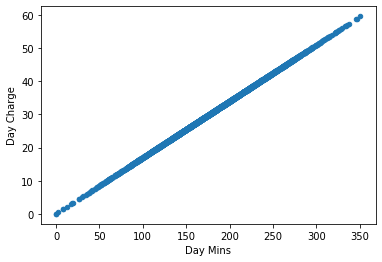

In [38]:
df_churn.plot(kind='scatter', x='Day Mins', y='Day Charge')

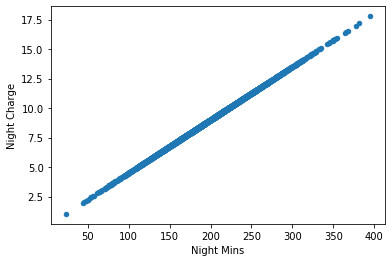

In [39]:
df_churn.plot(kind='scatter', x='Night Mins', y='Night Charge')

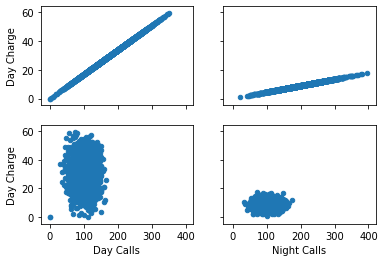

In [40]:
figure, axs = plt.subplots(2, 2, sharey=True, sharex=True)
df_churn.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
df_churn.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[0][1])
df_churn.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[1][0])
df_churn.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])

### Histogramas

Text(0.5, 1.0, 'Histogramas del N° llamadas al día')

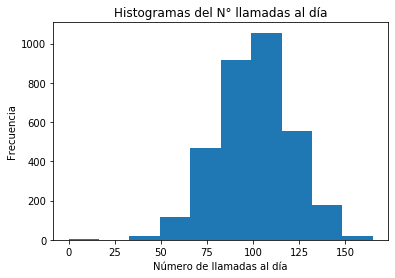

In [41]:
plt.hist(df_churn['Day Calls'])
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histogramas del N° llamadas al día')

¿Cuántos bins se recomienda dejar? Regla de Sturges es la respuesta.

$$c = 1 + \log_2(M)$$

Dónde;

- c = Número de bins
- M = Tamaño de la muestra




In [42]:
import numpy as np

In [43]:
c_bins = int(round(1 + np.log2(len(df_churn)), 0))
c_bins

13

Volvemos a graficas el histogramas siguiendo la regla de Sturges

Text(0.5, 1.0, 'Histogramas del N° llamadas al día')

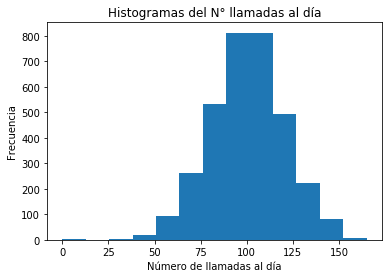

In [44]:
plt.hist(df_churn['Day Calls'], bins= c_bins)
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histogramas del N° llamadas al día')

### Boxplot

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

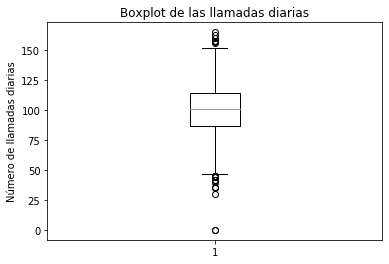

In [45]:
plt.boxplot(df_churn['Day Calls'])
plt.ylabel('Número de llamadas diarias')
plt.title('Boxplot de las llamadas diarias')

¿Cómo se interpreta?

In [46]:
df_churn['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [47]:
#Rango intercuatílico
IQR = df_churn['Day Calls'].quantile(0.75) - df_churn['Day Calls'].quantile(0.25)

#Valores del boxplot
Lim_inf = df_churn['Day Calls'].quantile(0.25) - 1.5*IQR
Lim_sup = df_churn['Day Calls'].quantile(0.75) + 1.5*IQR
quart_25 = df_churn['Day Calls'].quantile(0.25)
quart_50 = df_churn['Day Calls'].quantile(0.50)
quart_75 = df_churn['Day Calls'].quantile(0.75)
valores_box = [Lim_inf, Lim_sup, quart_25, quart_50, quart_75]


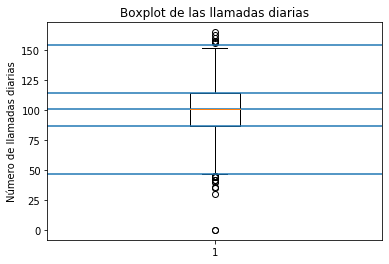

In [48]:
plt.boxplot(df_churn['Day Calls'])
plt.ylabel('Número de llamadas diarias')
plt.title('Boxplot de las llamadas diarias')
for valor in valores_box:
    plt.axhline(valor)

Cualquier valor que esté bajo 'Lim_inf' o sobre 'Lim_sup' se considera un "Outlier" 